In this Lab you will learn to build your own neural network classifier model. At first we will demonstrate how to build a network from scratch

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

#import the "make moons" dataset from sklearn as sample dataset

from ??


#Plot the dataset



[]

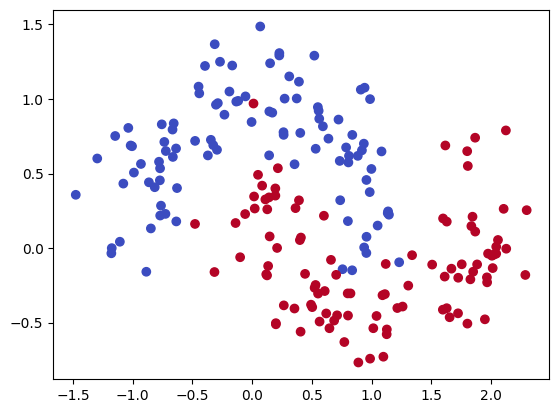

In [34]:
#importing the dataset
from sklearn.datasets import make_moons
data = make_moons()
x,y = make_moons(n_samples=200, noise=.2, random_state=42)

#Plotting the dataset
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="coolwarm")

plt.plot()

In [35]:
# check the datasets shape
print(x.shape)
print(y.shape)

(200, 2)
(200,)


In [36]:
# split the dataset into 80% train and 20% test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=33)

In [37]:
print(x.shape)
print(y.shape)

(200, 2)
(200,)


In [38]:
import keras
keras.__version__

'3.6.0'

In [39]:
from keras.src.models import Sequential  #import the model class
from keras.src.layers import Dense   # import the class required for a fully connected network
from keras.src.optimizers import SGD   # Import the Optimizer and gradient descent function


In [40]:
model = Sequential() #Take model object
model.add(keras.layers.Input(shape=(2,)))
model.add(keras.layers.Dense(units=50, activation="relu"))   #Add a single layer
model.add(keras.layers.Dense(units=1, activation="sigmoid"))    #define hyperparameters and compile

In [41]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201 (804.00 B)

 Trainable params: 201 (804.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [43]:
#Train model on test set
model.fit(x_train, y_train, epochs=50, batch_size=20)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1926 - loss: 0.7553  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2968 - loss: 0.7408  
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2551 - loss: 0.7331  
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2765 - loss: 0.7218  
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2696 - loss: 0.7102  
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3057 - loss: 0.7038 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4586 - loss: 0.6858
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5288 - loss: 0.6862
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6288 - loss: 0.6723  
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 0.6625  
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7114 - loss: 0.6502  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6885 - loss: 0.6

In [44]:
#evaluate model on test set
results = model.evaluate(x_test, y_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8313 - loss: 0.4488
The Accuracy score on the Train set is:	0.825


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


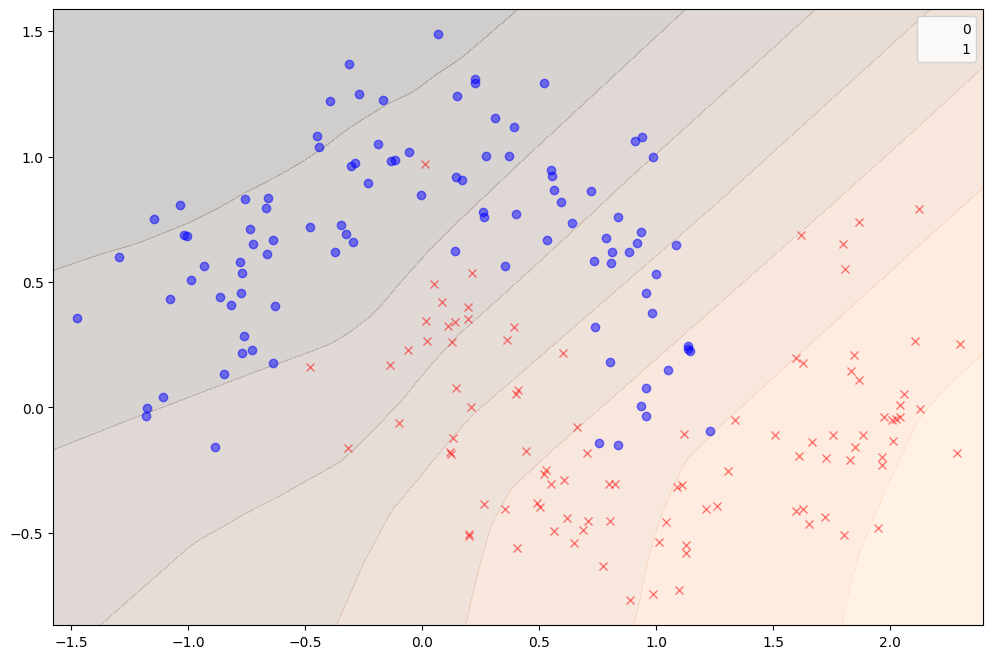

In [45]:
#Plot decision boundary

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='copper', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(["0", "1"])

plot_decision_boundary(model, x, y)

### Deep model : As the dataset cannot be classified accurately by a linear classifier, we need a non-linear model. For that we need to develop a deeper network

In [46]:
#Make a Neural Network of minimum layer of 3
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(units=200, activation="relu"),
        keras.layers.Dense(units=100, activation="relu"),
        keras.layers.Dense(units=100, activation="relu"),
        keras.layers.Dense(units=1, activation="sigmoid")
    ]
)
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [47]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=20)

Epoch 1/50


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5110 - loss: 0.6885 
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5296 - loss: 0.6819
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5588 - loss: 0.6769
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6348 - loss: 0.6711 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.6671  
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7523 - loss: 0.6613
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7853 - loss: 0.6524 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7097 - loss: 0.6596
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7671 - loss: 0.6434
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7811 - loss: 0.6375  
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7404 - loss: 0.6412  
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.6334  
Epoch 13/50
8

In [48]:
# Evaluate the model on test set
results = model.evaluate(x_test, y_test)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8313 - loss: 0.4146
The Accuracy score on the Train set is:	0.825


In [49]:
probabilities = model.predict(x_test)
y_pred = (probabilities > 0.5).astype(int)
  # Show first 5 probabilities
print("Binary Labels:\n", y_pred[:5]) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Binary Labels:
 [[1]
 [0]
 [1]
 [0]
 [0]]


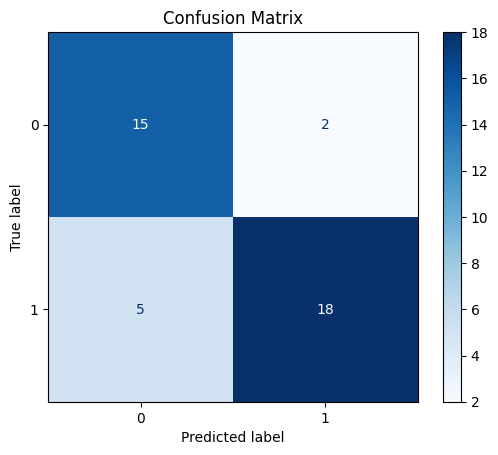

In [50]:
#Import the necessary library and objects from sklearn and print the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


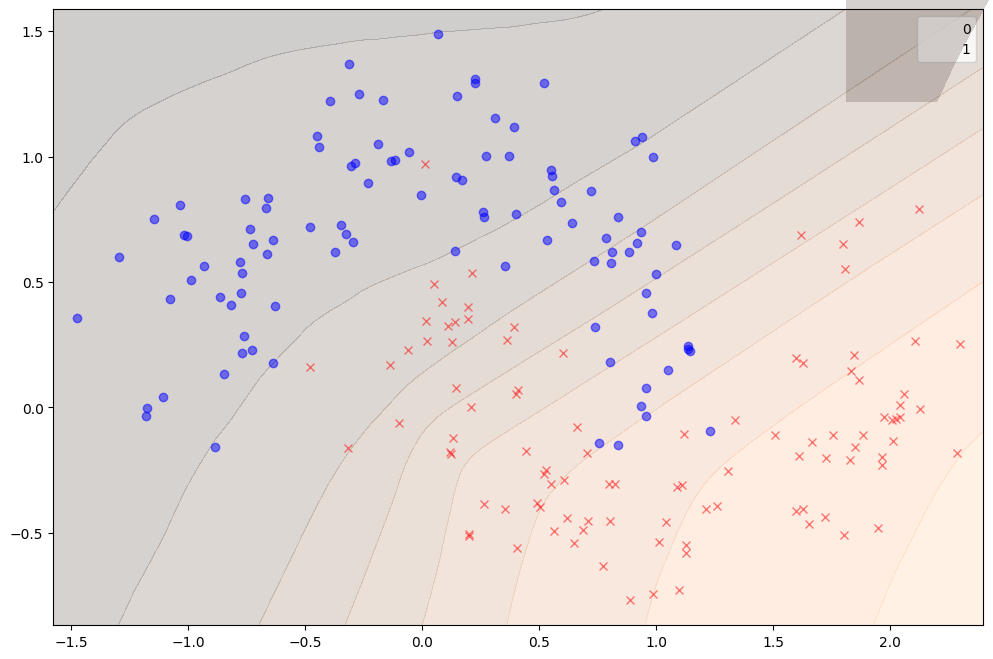

In [51]:
# #Plot the decision boundary

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='copper', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(["0", "1"])

plot_decision_boundary(model, x, y)

## Multiclass classification

### The Iris dataset

In [52]:
# Import the iris dataset and load it
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
#df = pd.DataFrame(data.data, columns=data.feature_names)
df = data.frame

In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
x = df.drop('target', axis=1)  #removing the last column, which is label
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
  #assign label names numerical value
from sklearn import preprocessing   
my_label = preprocessing.LabelEncoder()   
   
y = my_label.fit_transform(data.frame["target"])

In [56]:
 #convert labels string to numerical value
print(data.frame[ 'target' ].unique())  
print("Data Frame after Label Encoding:\n")  
print( data.frame )  

[0 1 2]
Data Frame after Label Encoding:

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1        

In [57]:
from keras.src.utils import to_categorical
y_cat = to_categorical(y)
print(y_cat[:5])

# now the output will be a 3X1 matrice. for example, if the label is "setosa", then label
# value will be [1, 0, 0]
# if the label value is "versicolor", label will be [0,1,0]


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [58]:
#Split the dataset, create a neural network and train it
x_train, x_test, y_train, y_test  = train_test_split(x, y_cat, test_size=.2, random_state=25)

In [59]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(4,)),
        keras.layers.Dense(units=500, activation="relu"),
        keras.layers.Dense(units=200, activation="relu"),
        keras.layers.Dense(units=100, activation="relu"),
        keras.layers.Dense(units=3, activation="softmax")
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3035 - loss: 0.6561
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6694 - loss: 0.5519
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7006 - loss: 0.4857
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7519 - loss: 0.4025 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7410 - loss: 0.3579  
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.3170
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9056 - loss: 0.2907
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9035 - loss: 0.2713
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.2544
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8940 - loss: 0.2402
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9617 - loss: 0.2112 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9519 - loss: 0.1916
Epoch 13/

In [61]:
#the accuracy

results = model.evaluate(x_test, y_test)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9667 - loss: 0.0666
The Accuracy score on the Train set is:	0.967


In [62]:
y_pred = model.predict(x_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [63]:
from sklearn.metrics import classification_report

report = classification_report(y_test_class, y_pred_class, target_names=data.target_names)
print(report)

# print the evaluation metrics: precision ,recall, f1-score,accuracy

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



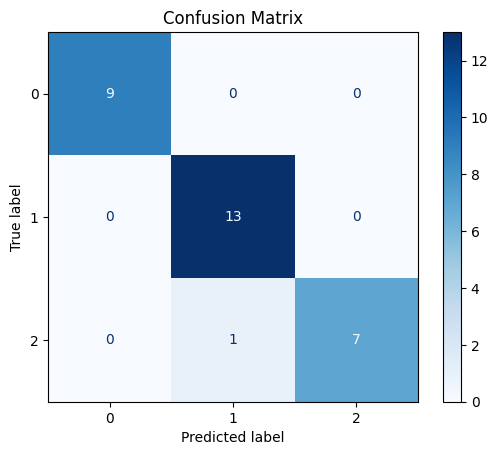

In [64]:
#print the confusion matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?